Done. You have the matrices PP QQ  RR  SS  WW.
  
Done.
Total Simulation Length =  500
Number of Initial Values Discarded =  100
  
These are the UNFILTERED SIMULATION results.
  
  
You have the matrices "Response" and "Response_named"
which contain the models simulated reponses to
given values for the exogenous stochastic processes.
  
These are expressd as %-deviations from steady state.
  
If you want, you can download these into an excel file
or use them to make plots.
  
 
 
You have the matrices "SS_level_Response" and "SS_level_Response_named" 
  
These variables are levels, which are calculated from given steady
values and simulated values for %-deviations from steady state.
  
 
 
You have the matrices "SS_ln_Response" and "SS_ln_Response_named" 
 
These are the equivalent natural log levels.
 
NOTE:  Some levels for certain variable are negative
due to their variability, i.e. large %-deviations from steady state
and the log of negative numbers is undefined.
  
  
Trend and c

Uhlig_simul_rand.ipynb:257: RuntimeWarning: invalid value encountered in log
  "#print('SS_level_Response_named[:,0:6] = ')\n",
Detrend_Filters.ipynb:122: RuntimeWarning: invalid value encountered in log
  "Input_mat_named = Input_level_mat_named\n",
Detrend_Filters.ipynb:123: RuntimeWarning: invalid value encountered in log
  "\n",


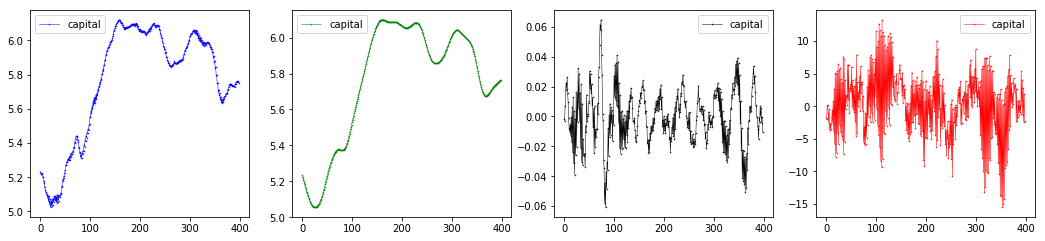

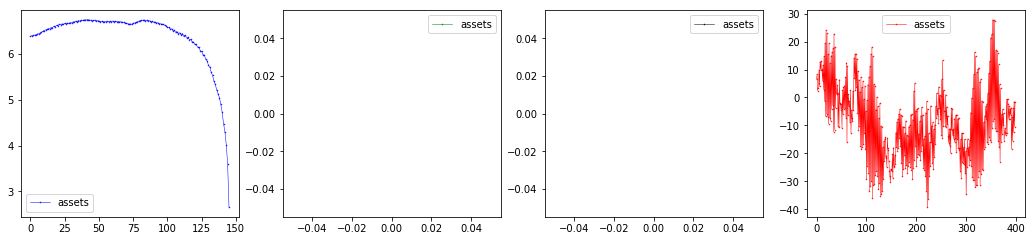

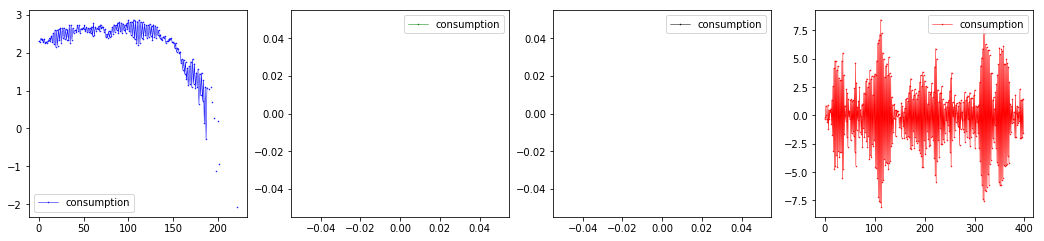

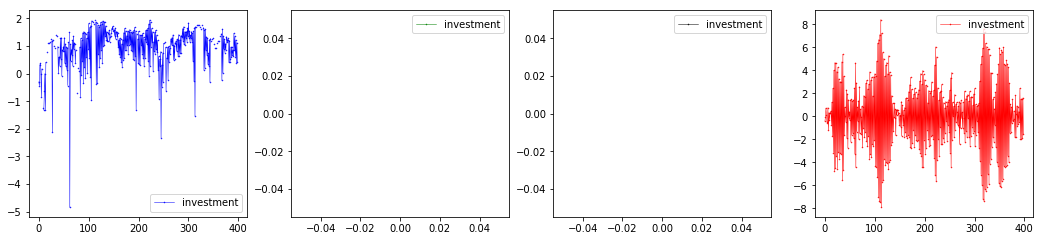

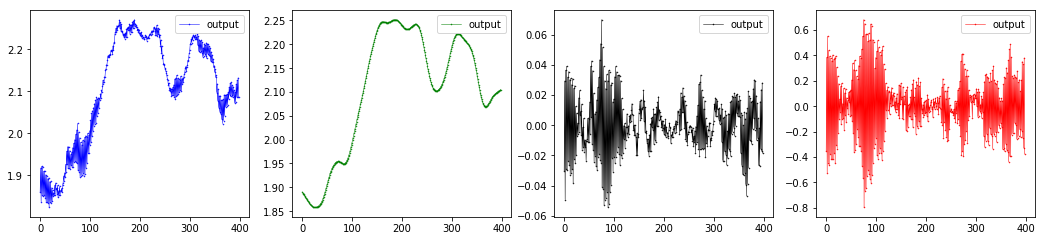

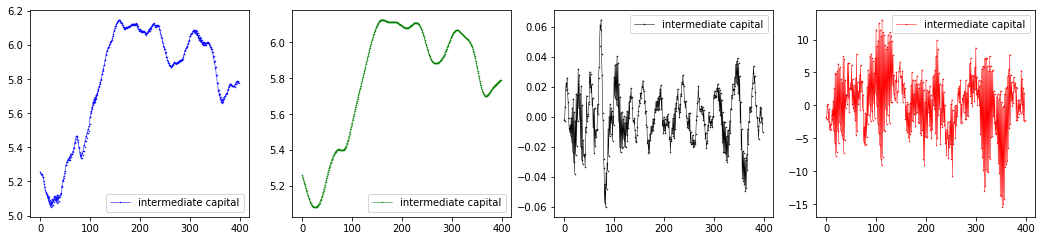

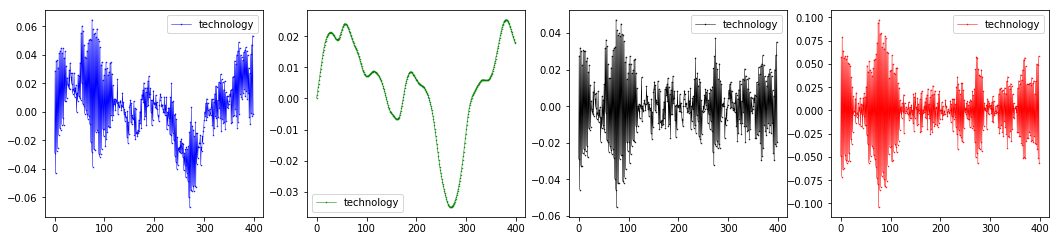

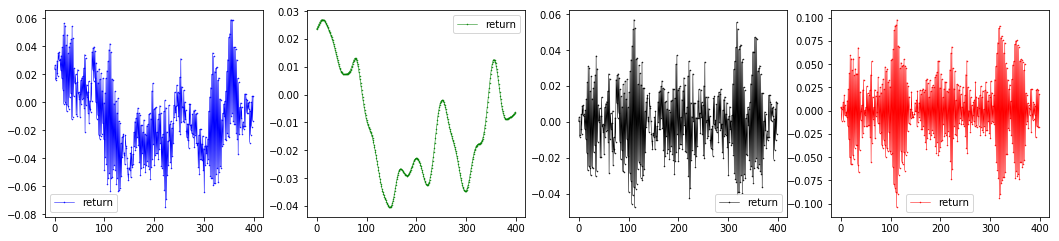

  
  
Shocks used in simulation
  


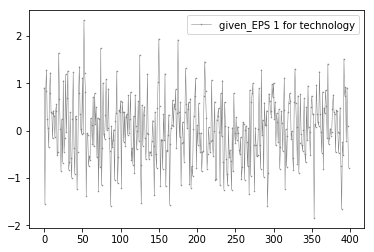

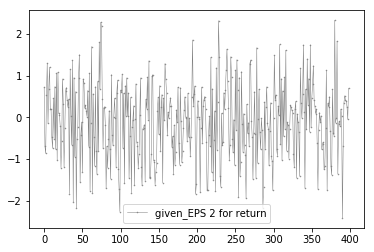

   
   
 
START:   Moments for Cyclical Ln Levels
  
  
  
Here are the table of moments.
You can also dowload the tables named Mom_Table_01 to _04.
  
  
 
Table 01:  Mean, Standard Deviation, Coefficient of Variation
                 for Cyclical Ln Levels
 


,Mean,Std Deviation,Coeff of Variation
capital,6.427297e-06,1.826509e-02,2.841800e+03
assets,nan,nan,nan
consumption,nan,nan,nan
investment,nan,nan,nan
output,-5.460230e-05,1.922585e-02,-3.521069e+02
intermediate capital,6.703322e-06,1.810117e-02,2.700328e+03
technology,-5.515433e-05,1.732241e-02,-3.140717e+02
return,7.342349e-06,2.057736e-02,2.802559e+03


 
 
 
Table 02:  Cross Correlation with Output, Standard Deviation Relative to Output
                 for Cyclical Ln Levels
 


,Correlation with GDP,Std Dev Relative to GDP
capital,1.254087e-01,9.500280e-01
assets,nan,nan
consumption,nan,nan
investment,nan,nan
output,1.000000e+00,1.000000e+00
intermediate capital,1.362577e-01,9.415015e-01
technology,9.190098e-01,9.009960e-01
return,4.197651e-01,1.070297e+00


 
 
  
Table 03:  Autocorrelations  for Cyclical Ln Levels
                  corr{ y(t=0), y(t +/- i) } 
 


,capital,assets,consumption,investment,output,intermediate capital,technology,return
6,2.974623e-01,nan,nan,nan,7.319623e-01,2.902226e-01,7.623560e-01,7.448447e-01
5,1.664981e-01,nan,nan,nan,-6.691555e-01,1.829988e-01,-8.128601e-01,-7.767663e-01
4,5.918482e-01,nan,nan,nan,8.249331e-01,5.884457e-01,8.298891e-01,8.063452e-01
3,4.310184e-01,nan,nan,nan,-6.524196e-01,4.531856e-01,-8.448271e-01,-8.050970e-01
2,8.617974e-01,nan,nan,nan,9.170547e-01,8.612990e-01,9.078098e-01,8.974416e-01
1,6.234974e-01,nan,nan,nan,-6.391443e-01,6.497271e-01,-8.643627e-01,-8.149132e-01
0,1.000000e+00,nan,nan,nan,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
-1,6.234974e-01,nan,nan,nan,-6.391443e-01,6.497271e-01,-8.643627e-01,-8.149132e-01
-2,8.617974e-01,nan,nan,nan,9.170547e-01,8.612990e-01,9.078098e-01,8.974416e-01
-3,4.310184e-01,nan,nan,nan,-6.524196e-01,4.531856e-01,-8.448271e-01,-8.050970e-01


 
 
  
Table 04:  Cross Correlations with Output  for Cyclical Ln Levels
                  corr{ gdp(t=0), y(t +/- i) }
 


,capital,assets,consumption,investment,output,intermediate capital,technology,return
6,-1.753400e-01,nan,nan,nan,7.319623e-01,-1.655665e-01,7.042798e-01,4.882458e-01
5,2.852068e-01,nan,nan,nan,-6.691555e-01,2.792339e-01,-7.539828e-01,-3.687506e-01
4,-6.249214e-02,nan,nan,nan,8.249331e-01,-5.200026e-02,7.685339e-01,4.735624e-01
3,3.847936e-01,nan,nan,nan,-6.524196e-01,3.798820e-01,-7.793463e-01,-3.732262e-01
2,4.431541e-02,nan,nan,nan,9.170547e-01,5.529077e-02,8.389369e-01,4.565017e-01
1,4.719146e-01,nan,nan,nan,-6.391443e-01,4.676196e-01,-7.958395e-01,-3.924262e-01
0,1.254087e-01,nan,nan,nan,1.000000e+00,1.362577e-01,9.190098e-01,4.197651e-01
-1,5.198977e-01,nan,nan,nan,-6.391443e-01,5.151998e-01,-7.975692e-01,-4.446570e-01
-2,1.381228e-01,nan,nan,nan,9.170547e-01,1.472448e-01,8.476344e-01,3.416210e-01
-3,4.572498e-01,nan,nan,nan,-6.524196e-01,4.519191e-01,-7.807169e-01,-4.538495e-01


 
 
END:   Moments for Cyclical Ln Levels
 
 
START:   Moments for Ln First Differences
  
  
  
Here are the table of moments.
You can also dowload the tables named Mom_Table_01 to _04.
  
  
 
Table 01:  Mean, Standard Deviation, Coefficient of Variation
                 for Ln First Differences
 


,Mean,Std Deviation,Coeff of Variation
capital,3.168244e-01,5.051724e+00,1.594487e+01
assets,-8.939056e+00,1.367454e+01,-1.529752e+00
consumption,-8.488392e-02,3.192636e+00,-3.761179e+01
investment,8.646173e-04,3.159619e+00,3.654356e+03
output,3.200226e-03,2.593693e-01,8.104718e+01
intermediate capital,3.248481e-01,4.999070e+00,1.538895e+01
technology,-5.782660e-05,3.381327e-02,-5.847356e+02
return,-4.004239e-05,3.889083e-02,-9.712414e+02


 
 
 
Table 02:  Cross Correlation with Output, Standard Deviation Relative to Output
                 for Ln First Differences
 


,Correlation with GDP,Std Dev Relative to GDP
capital,-3.502469e-01,1.947695e+01
assets,3.278165e-01,5.272228e+01
consumption,-5.002143e-01,1.230923e+01
investment,-4.879658e-01,1.218193e+01
output,1.000000e+00,1.000000e+00
intermediate capital,-3.419263e-01,1.927395e+01
technology,9.776906e-01,1.303673e-01
return,5.083971e-01,1.499438e-01


 
 
  
Table 03:  Autocorrelations  for Ln First Differences
                  corr{ y(t=0), y(t +/- i) } 
 


,capital,assets,consumption,investment,output,intermediate capital,technology,return
6,7.621105e-01,8.127566e-01,8.247498e-01,8.231997e-01,8.473089e-01,7.576760e-01,8.350368e-01,8.259684e-01
5,-4.186220e-01,-7.754137e-02,-8.504096e-01,-8.506854e-01,-8.537140e-01,-3.871163e-01,-8.624371e-01,-8.529614e-01
4,8.298291e-01,8.675258e-01,8.784551e-01,8.774002e-01,8.969981e-01,8.263641e-01,8.891052e-01,8.793461e-01
3,-4.269311e-01,-8.006211e-02,-9.087645e-01,-9.096471e-01,-9.018984e-01,-3.917459e-01,-9.179580e-01,-9.109495e-01
2,9.138934e-01,9.326156e-01,9.400393e-01,9.395008e-01,9.477361e-01,9.120289e-01,9.440038e-01,9.404611e-01
1,-4.274469e-01,-7.692312e-02,-9.681743e-01,-9.697256e-01,-9.474905e-01,-3.879223e-01,-9.719667e-01,-9.700190e-01
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
-1,-4.274469e-01,-7.692312e-02,-9.681743e-01,-9.697256e-01,-9.474905e-01,-3.879223e-01,-9.719667e-01,-9.700190e-01
-2,9.138934e-01,9.326156e-01,9.400393e-01,9.395008e-01,9.477361e-01,9.120289e-01,9.440038e-01,9.404611e-01
-3,-4.269311e-01,-8.006211e-02,-9.087645e-01,-9.096471e-01,-9.018984e-01,-3.917459e-01,-9.179580e-01,-9.109495e-01


 
 
  
Table 04:  Cross Correlations with Output  for Ln First Differences
                  corr{ gdp(t=0), y(t +/- i) }
 


,capital,assets,consumption,investment,output,intermediate capital,technology,return
6,-3.803531e-01,3.415883e-01,-5.069708e-01,-4.971457e-01,8.473089e-01,-3.727299e-01,8.146650e-01,5.134903e-01
5,4.585515e-01,-4.150254e-01,4.996827e-01,4.912540e-01,-8.537140e-01,4.540219e-01,-8.431155e-01,-5.093451e-01
4,-3.691760e-01,3.357896e-01,-5.003560e-01,-4.897363e-01,8.969981e-01,-3.614664e-01,8.691835e-01,5.075159e-01
3,4.574199e-01,-4.126708e-01,4.952874e-01,4.860114e-01,-9.018984e-01,4.530753e-01,-8.975571e-01,-5.056099e-01
2,-3.609793e-01,3.327046e-01,-4.999975e-01,-4.885887e-01,9.477361e-01,-3.530215e-01,9.230204e-01,5.077027e-01
1,4.635714e-01,-4.162592e-01,4.935390e-01,4.835444e-01,-9.474905e-01,4.595565e-01,-9.498136e-01,-5.046245e-01
0,-3.502469e-01,3.278165e-01,-5.002143e-01,-4.879658e-01,1.000000e+00,-3.419263e-01,9.776906e-01,5.083971e-01
-1,4.746798e-01,-4.211446e-01,4.935913e-01,4.835684e-01,-9.474905e-01,4.710673e-01,-9.525112e-01,-5.048454e-01
-2,-3.401518e-01,3.214994e-01,-4.739904e-01,-4.626689e-01,9.477361e-01,-3.325553e-01,9.285097e-01,4.821724e-01
-3,4.414767e-01,-3.869661e-01,4.667648e-01,4.568658e-01,-9.018984e-01,4.378097e-01,-9.055517e-01,-4.770353e-01


 
 
END:   Moments for Ln First Differences
 


In [2]:
#  Uhlig's Exampl6.m
#  A Small Open Economy Stochastic Neoclassical 
#  Growth Model with Adjustment Costs for Capital

import numpy as np

Z_bar = 1
NPV_frac = 0.5
rho = 0.36
delta = 0.025
R_bar = 1.01
eta = 1.0
theta = 0.8
psi_z = 0.95
sigma_z = 0.712
psi_r = 0.95
sigma_r = 1.0
corr_z_r = 0

betta = 1.0/R_bar
XK_bar = ((1+delta)**theta - 1)**(1.0/theta)
FK_omt = (1+delta)**(1-theta)
FX_omt = FK_omt/XK_bar**(1-theta)
YK_bar = (R_bar - FK_omt + delta)/(rho*FX_omt)
K_bar = (Z_bar/YK_bar)**(1.0/(1-rho))
Y_bar = Z_bar*K_bar**rho
X_bar = XK_bar*K_bar
F_bar = (1+delta)*K_bar
A_bar = NPV_frac * (Y_bar/(R_bar - 1))
C_bar = Y_bar - X_bar + (R_bar - 1)*A_bar

VARNAMES = ['capital',
                         'assets',
                         'consumption',
                         'investment',
                         'output',
                         'intermediate capital',
                         'technology',
                         'return']

SteadyState = [[K_bar],
                         [A_bar],
                         [C_bar],
                         [X_bar],
                         [Y_bar],
                         [F_bar],
                         [1],
                         [R_bar]]

AA = np.vstack(([ 0, -A_bar],
                           [0, 0], 
                           [-1, 0],    
                           [0, 0]))

BB = np.vstack(([0, R_bar*A_bar],
                           [rho, 0],
                           [-delta, 0],       
                           [K_bar**theta, 0]))

CC = np.vstack(([ -C_bar, -X_bar, Y_bar, 0],
                           [0, 0, -1, 0],
                           [0, 0, 0,(1+delta)],
                           [0, X_bar**theta, 0, (-F_bar**theta) ]))


DD = np.vstack(([0,R_bar*A_bar],
                           [1,0],
                           [0,0],          
                           [0,0]))

FF = np.vstack(([0,0], 
                          [0,0]))

GG = np.vstack(([0, 0],
                           [(-((rho/R_bar)*YK_bar*FX_omt + (1-theta)*FK_omt/R_bar) ),0]))

HH = np.vstack(([0,0],
                           [0,0]))

JJ = np.vstack(([-eta, 0, 0, 0],     
                          [-eta,(1-theta)*(FK_omt-delta)/R_bar,(rho/R_bar)*YK_bar*FX_omt,delta*(1-theta)/R_bar]))

KK = np.vstack(([eta, 0, 0, 0],
                           [eta,theta-1,0,1-theta]))

LL = np.vstack(([0,1],
                          [0,0]))

MM = np.vstack(([0,0],
                            [0,0]))

NN = np.vstack(([psi_z, 0],
                           [0, psi_r ]))

Sigma = np.vstack(([sigma_z**2, corr_z_r*sigma_z*sigma_r], 
                                [corr_z_r*sigma_z*sigma_r, sigma_r**2]))

Sigma_EPS = Sigma


%run Uhlig_solver_abreviated.ipynb

#print(' ')
#print('PP')
#print(PP.shape)
#print(PP)
#print(' ')
#print('RR')
#print(RR.shape)
#print(RR)
#print(' ')
#print('QQ')
#print(QQ.shape)
#print(QQ)
#print(' ')
#print('SS')
#print(SS.shape)
#print(SS)
#print(' ')


%run Uhlig_simul_rand.ipynb

%run Detrend_Filters.ipynb

##  USER INPUT:  Remember to set
##  output_index  in the Calc_Moments.ipynb
## This is different for each model

output_index = 4


#  To calculate moments for cyclical ln levels

print(' ')
print('START:   Moments for Cyclical Ln Levels')

Input_momat =  Mat_ln_cycle
Input_momat_named = Mat_ln_cycle_named
label_mom = 'for Cyclical Ln Levels'

%run Calc_Moments.ipynb

print('END:   Moments for Cyclical Ln Levels')
print(' ')

#  To calculate moments for ln first differences

print(' ')
print('START:   Moments for Ln First Differences')

Input_momat =  Mat_ln_1st_diff 
Input_momat_named = Mat_ln_1st_diff_named
label_mom = 'for Ln First Differences'

%run Calc_Moments.ipynb

print('END:   Moments for Ln First Differences')
print(' ')




